In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kourou
Processing Record 2 of Set 1 | bardai
Processing Record 3 of Set 1 | kamaishi
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | esmeralda
Processing Record 6 of Set 1 | remire-montjoly
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | okahandja
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | antonio enes
Processing Record 12 of Set 1 | zwiesel
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | san mariano
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | vilyuchinsk
Processing Record 17 of Set 1 | ringkobing
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | hammerfest
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | hilo
Processing Record 23 o

Processing Record 41 of Set 4 | al jawf
Processing Record 42 of Set 4 | kidal
Processing Record 43 of Set 4 | isola di capo rizzuto
Processing Record 44 of Set 4 | saint-paul
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | paita
Processing Record 47 of Set 4 | riverton
Processing Record 48 of Set 4 | poquoson
Processing Record 49 of Set 4 | siem reap
Processing Record 0 of Set 5 | abilene
Processing Record 1 of Set 5 | okha
Processing Record 2 of Set 5 | san antonio de pale
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | turkler
City not found. Skipping...
Processing Record 5 of Set 5 | yeniseysk
Processing Record 6 of Set 5 | lijiang
Processing Record 7 of Set 5 | gadzhiyevo
Processing Record 8 of Set 5 | xinyuan
Processing Record 9 of Set 5 | bowie
Processing Record 10 of Set 5 | nyurba
Processing Record 11 of Set 5 | berea
Processing Record 12 of Set 5 | madalena
Processing Record 13 of Set 5 | cockburn town
Processing Record 14 of 

Processing Record 32 of Set 8 | sinop
Processing Record 33 of Set 8 | briancon
Processing Record 34 of Set 8 | alamo
Processing Record 35 of Set 8 | clarence town
Processing Record 36 of Set 8 | trail
Processing Record 37 of Set 8 | al bawiti
Processing Record 38 of Set 8 | smithers
Processing Record 39 of Set 8 | levelland
Processing Record 40 of Set 8 | sapulpa
Processing Record 41 of Set 8 | thunder bay
Processing Record 42 of Set 8 | spanish wells
Processing Record 43 of Set 8 | tenenkou
Processing Record 44 of Set 8 | stephenville
Processing Record 45 of Set 8 | guaratuba
Processing Record 46 of Set 8 | semnan
Processing Record 47 of Set 8 | kununurra
Processing Record 48 of Set 8 | mili
Processing Record 49 of Set 8 | san luis de la loma
Processing Record 0 of Set 9 | sao tome
Processing Record 1 of Set 9 | unai
Processing Record 2 of Set 9 | mugia
Processing Record 3 of Set 9 | mbandaka
Processing Record 4 of Set 9 | kirakira
Processing Record 5 of Set 9 | kubey
City not found. 

Processing Record 23 of Set 12 | hinatuan
Processing Record 24 of Set 12 | pirallahi
Processing Record 25 of Set 12 | beira
Processing Record 26 of Set 12 | zyryanskoye
Processing Record 27 of Set 12 | el abiodh sidi cheikh
Processing Record 28 of Set 12 | qal'at bishah
City not found. Skipping...
Processing Record 29 of Set 12 | rio grande
Processing Record 30 of Set 12 | benguela
Processing Record 31 of Set 12 | raduzhny
Processing Record 32 of Set 12 | robat karim
Processing Record 33 of Set 12 | fort st. john
Processing Record 34 of Set 12 | izyum
Processing Record 35 of Set 12 | cananeia
Processing Record 36 of Set 12 | sola
Processing Record 37 of Set 12 | usinsk
Processing Record 38 of Set 12 | kuusamo
Processing Record 39 of Set 12 | brisas barra de suchiate
Processing Record 40 of Set 12 | rizokarpaso
Processing Record 41 of Set 12 | boca do acre
Processing Record 42 of Set 12 | greymouth
Processing Record 43 of Set 12 | agat village
Processing Record 44 of Set 12 | maintirano

In [4]:
#convert city weather data to dataframe and count the number of values
city_weather_df = pd.DataFrame(city_data, columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", 
                                                     "Wind Speed", "Country", "Date"])
city_weather_df.count()


City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [5]:
#display data frame
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kourou,5.1552,-52.6478,23.03,89,24,2.74,GF,1689650288
1,bardai,11.6500,7.2333,23.79,77,93,3.21,NG,1689650288
2,kamaishi,39.2667,141.8833,24.27,89,100,4.12,JP,1689650289
3,waitangi,-43.9535,-176.5597,12.12,87,59,6.26,NZ,1689650289
4,esmeralda,21.8525,-78.1169,26.66,84,7,3.45,CU,1689650289


In [6]:
# Export the City_Data into a csv, read the csv, then display it
city_weather_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_weather_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kourou,5.1552,-52.6478,23.03,89,24,2.74,GF,1689650288
1,bardai,11.6500,7.2333,23.79,77,93,3.21,NG,1689650288
2,kamaishi,39.2667,141.8833,24.27,89,100,4.12,JP,1689650289
3,waitangi,-43.9535,-176.5597,12.12,87,59,6.26,NZ,1689650289
4,esmeralda,21.8525,-78.1169,26.66,84,7,3.45,CU,1689650289


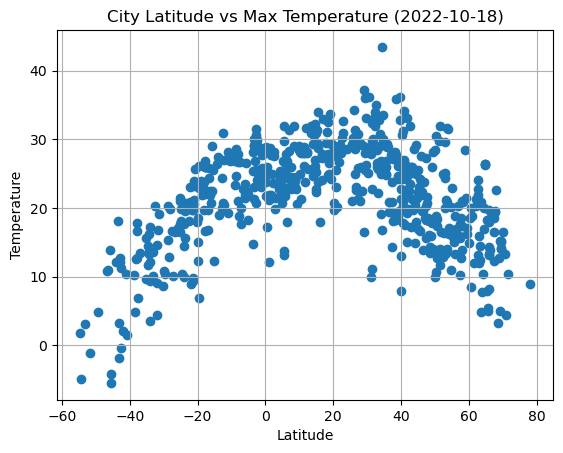

In [7]:
#create a scatter plot showing latitude versus temperature
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs Max Temperature (2022-10-18)")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

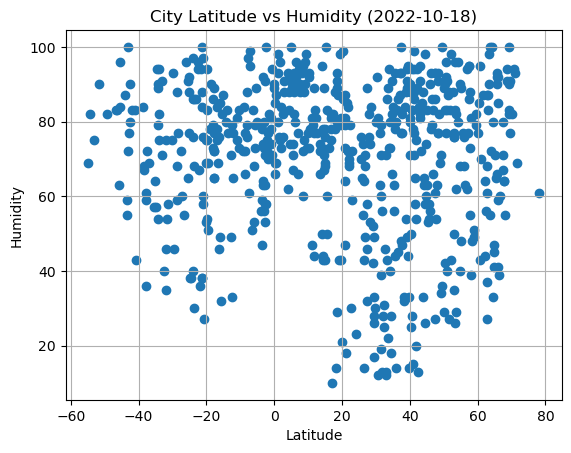

In [8]:
#create a scatter plot showing latitude versus humitidy
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

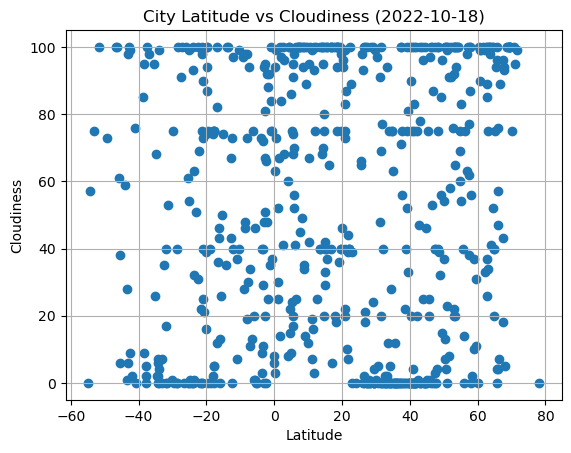

In [9]:
#create a scatter plot showing latitude versus cloudiness
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

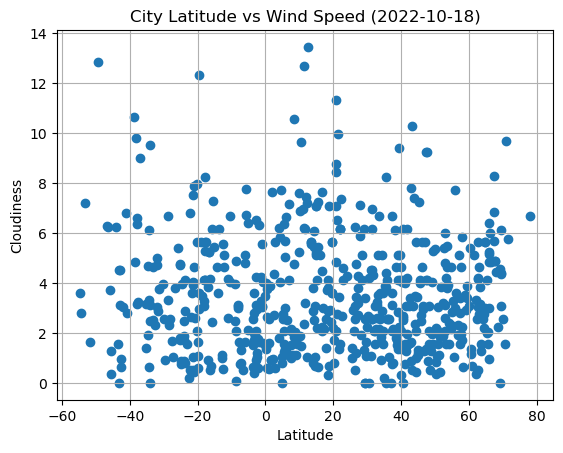

In [10]:
#create a scatter plot showing latitude versus wind speed
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

In [11]:
#create a dataframe for cities in the northern hemisphere
northern_hemi_df = city_weather_df.loc[city_weather_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kourou,5.1552,-52.6478,23.03,89,24,2.74,GF,1689650288
1,bardai,11.6500,7.2333,23.79,77,93,3.21,NG,1689650288
2,kamaishi,39.2667,141.8833,24.27,89,100,4.12,JP,1689650289
4,esmeralda,21.8525,-78.1169,26.66,84,7,3.45,CU,1689650289
5,remire-montjoly,4.9167,-52.2667,23.02,100,9,0.00,GF,1689650289


In [12]:
#create a dataframe for cities in the southern hemisphere
southern_hemi_df = city_weather_df.loc[city_weather_df["Lat"] <= 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,12.12,87,59,6.26,NZ,1689650289
8,okahandja,-21.9833,16.9167,8.85,36,0,2.65,NaN,1689650290
10,antonio enes,-16.2325,39.9086,21.90,76,46,4.14,MZ,1689650291
14,bredasdorp,-34.5322,20.0403,11.75,94,2,1.93,ZA,1689650291
20,port-aux-francais,-49.3500,70.2167,4.87,82,73,12.85,TF,1689650292


The r-value is:-0.5380804566159221


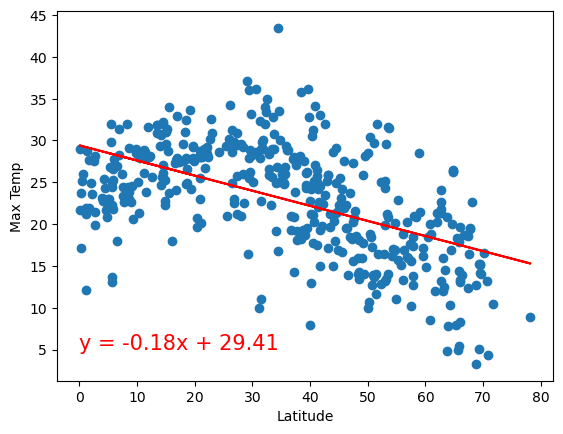

In [13]:
#determine the linear regression of latitude versus temperature for the northern hemisphere and plot it. 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

 #calculate liner regression, line equation, and print it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")

print("The r-value is:" + str(rvalue))
plt.show()

The r-value is:0.8156962606884427


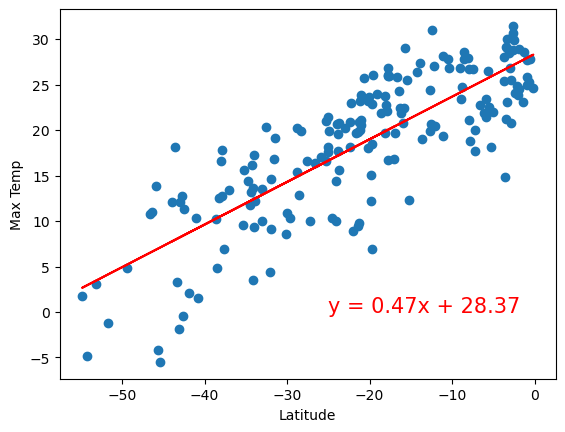

In [14]:
#determine the linear regression of latitude versus temperature for the southern hemisphere and plot it. 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

 #calculate liner regression, line equation, and print it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,0),fontsize=15,color="red")

print("The r-value is:" + str(rvalue))
plt.show()

Both of the scatter plots depicting the linear regression of both the nothern and southern hemispheres show a strong correlation between temperature and latitude. For the northern hemisphere, the linear regression shows a negative trend, with the further away from the equator, depicted as a zero on the x-axis, the lower the maximum temperature per town. On the contrary, the southern hemisphere depicts a positive linear regression, as the closer one gets to the equator, the higher the temperature. 

The r-value is:-0.08104943389804668


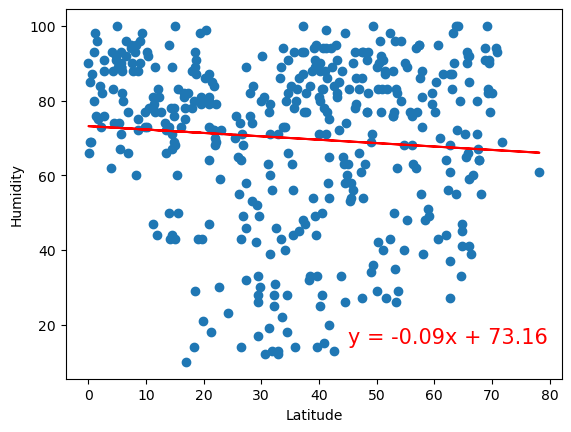

In [15]:
#determine the linear regression of latitude versus humidity for the northern hemisphere and plot it. 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')


 #calculate liner regression, line equation, and print it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

print("The r-value is:" + str(rvalue))
plt.show()

The r-value is:0.0036803633810296344


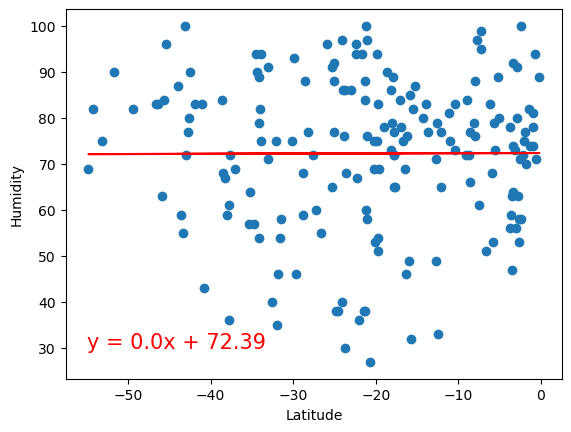

In [16]:
#determine the linear regression of latitude versus humidity for the southern hemisphere and plot it. 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

 #calculate liner regression, line equation, and print it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

print("The r-value is:" + str(rvalue))
plt.show()

The scatter plots depicting the linear regression between latitude and humidity for the nothern and southern hemispheres both show a weak correlation,  with a negative linear regression for the northern hemisphere, and a near zero linear for the southern. In both scatter plots, the data is scattered relatively equally, though the northern hemisphere plot does show more cities with humidity between 60-100%. This could be a potential indicator that the nothern hemisphere is prone to higher humidity than the southern. However, it  could also be a result of the randomly generated list of cities from the API call.  

The r-value is:0.005490039750826579


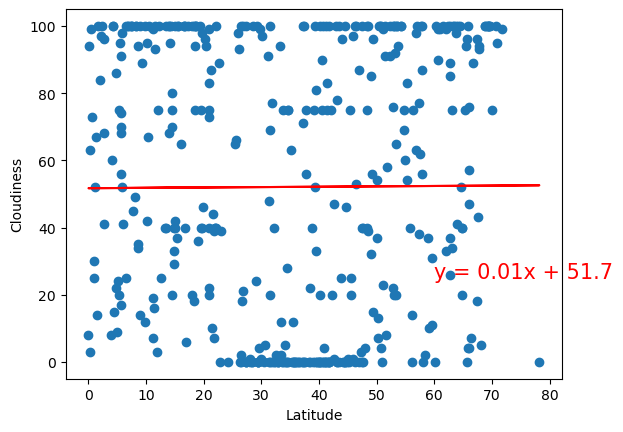

In [17]:
#determine the linear regression of latitude versus cloudiness for the northern hemisphere and plot it. 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


 #calculate liner regression, line equation, and print it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,25),fontsize=15,color="red")

print("The r-value is:" + str(rvalue))
plt.show()

The r-value is:0.04722101025742061


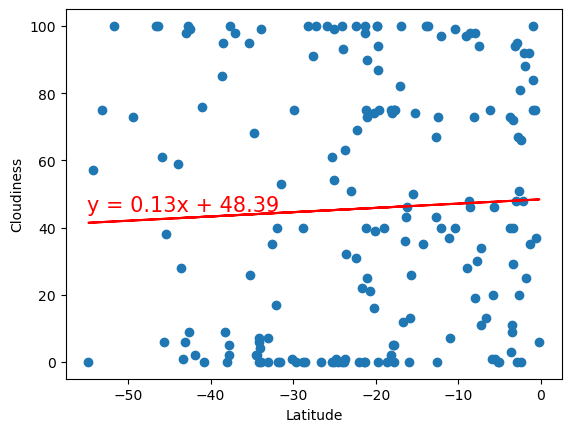

In [18]:
#determine the linear regression of latitude versus cloudiness for the southern hemisphere and plot it. 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


 #calculate liner regression, line equation, and print it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")

print("The r-value is:" + str(rvalue))
plt.show()

Both of the scatter plots that visualize the relationship between Cloudiness and Latitude have weak correlations. For the northern hemisphere, a weak positive linear regression is shown. The southern hemisphere plot depicts a slight stronger positive correlation. However, it should be noted that both the southern and northern hemispheres present a decent percentage of cities that either have 100 percent cloudiness, or zero clouds. Unlike the Latitude versus temperature scatter plots, the the data is evenly distributed along the x-axis, thus implying little correlation between cloudiness and latitude. 

The r-value is:-0.038914730116044446


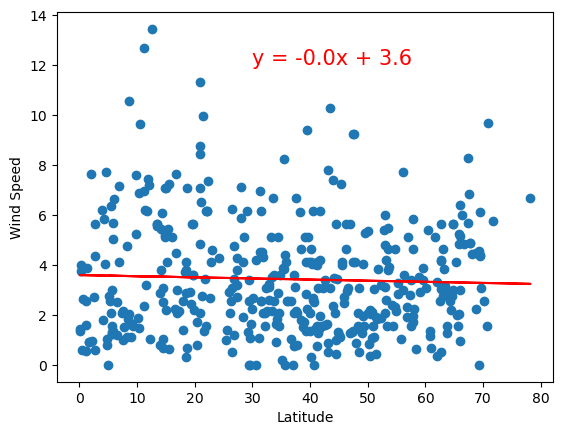

In [19]:
#determine the linear regression of latitude versus wind speed for the northern hemisphere and plot it. 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


 #calculate liner regression, line equation, and print it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")

print("The r-value is:" + str(rvalue))
plt.show()

The r-value is:-0.16065556072680412


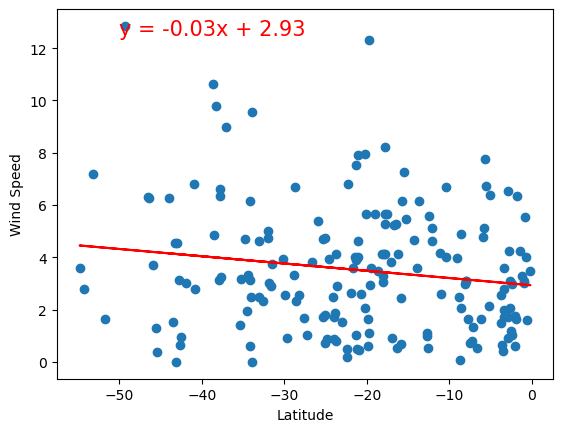

In [20]:
#determine the linear regression of latitude versus wind speed for the southern hemisphere and plot it. 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


 #calculate liner regression, line equation, and print it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12.5),fontsize=15,color="red")

print("The r-value is:" + str(rvalue))
plt.show()

In the scatter plots displaying the Wind speed versus city latitude, little to no linear regression is shown. This directly implies there is little to no correlation between wind speed and city location. The data points occur more frequently within the lower wind speeds, thus implying that lower wind speeds are more frequent in both northern and southern hemispheres. Beyond this trend, the data is relatively evenly dispersed.  